# Week 2 Micro - Internship Open Avenues

In [37]:
import pandas as pd
import numpy as np
csv = pd.read_csv("open_ave_data.csv")
csv.fillna("empty", inplace=True)

Analyzing Text Statistics

For these examples of text statistics, I will first analyze the character length of all of the categories in the dataset to see how each one differs from the other.

([<matplotlib.axis.XTick at 0x19b2b636cd0>,
 [Text(0, 0, 'impressions'),
  Text(1, 0, 'findings'),
  Text(2, 0, 'clinical data'),
  Text(3, 0, 'exam')])

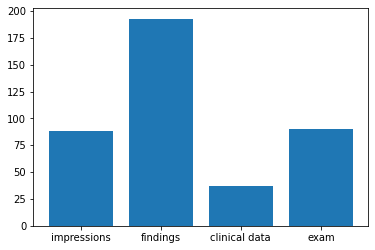

In [38]:
import matplotlib.pyplot as plt

impression = csv["impression"]
findings = csv["findings"]
clinical = csv["clinicaldata"]
exam = csv["ExamName"]
impr_mean = impression.str.len().mean()
find_mean = findings.str.len().mean()
clin_mean = clinical.str.len().mean()
exam_mean = exam.str.len().mean()

char_len = [impr_mean, find_mean, clin_mean, exam_mean]
labels = ["impressions", "findings", "clinical data", "exam"]

x = range(len(char_len))

plt.bar(x, char_len)
plt.xticks(x,labels)

Clearly, findings happen to be the column with the most characters, and clinical data is the shortest. I think this may reveal interesting information about how we can classify some of the categories by character count alone.

Now, let's analyze word length.

[7.397103481634924, 6.615285952080443, 6.626108375991428, 5.63506436637687]


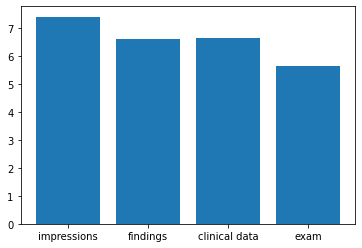

In [49]:
impr_words = impression.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).mean()
findings_words = findings.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).mean()

clin_words = clinical.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).mean()
exam_words = exam.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).mean()

words_bar = [impr_words, findings_words, clin_words, exam_words]
x = range(len(words_bar))
plt.bar(x, words_bar)
plt.xticks(x,labels)
print(words_bar)

Interestingly, impressions tend to have longer words on average than findings. Exams tend to have the shortest words with makes the most sense considering the data.

The next section will involve finding the frequency of stop words from the impressions. Here, I'll use the NLTK library to get a list of english stop words and some data structures such as a FreqDist to help me count the frequency of the stop words.

<AxesSubplot:>

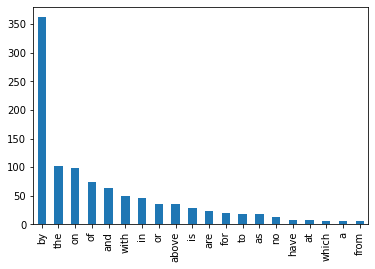

In [65]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop=set(stopwords.words('english'))
words = impression.apply(lambda x : word_tokenize(x)).values.tolist()
words = [word for i in words for word in i]

stop_words = [i for i in words if i in stop]

stop_freq = FreqDist(stop_words)
stop_fdist = pd.Series(dict(stop_freq.most_common(20)))

stop_fdist.plot.bar()

I'll rerun the same code, but this time on the non-stop words. Let's see what the results will yield.

<AxesSubplot:>

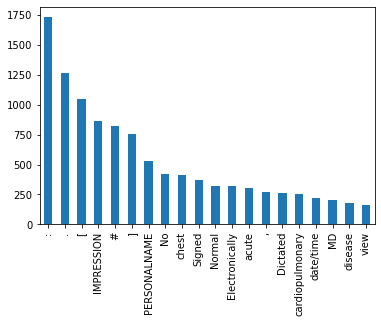

In [66]:
# removing stop words from the list
impr_words = [i for i in words if i not in stop]

impr_fdist = FreqDist(impr_words)
impr_fdist = pd.Series(dict(impr_fdist.most_common(20)))

impr_fdist.plot.bar()

It seems to be a lot of punctuation marks in the data that are making the results a bit hard to read. I'll remove them in the next step by using a RegEx tokenizer that will remove punctuation and only maintain alphanumeric characters. 

<AxesSubplot:>

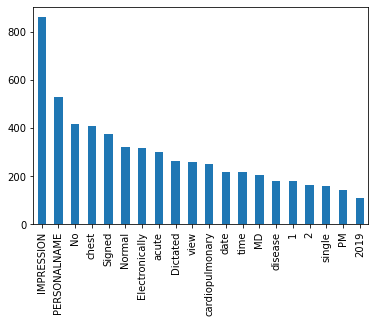

In [93]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
words_df = impression.apply(lambda x : [i for i in tokenizer.tokenize(x) if i not in stop])
words = words_df.values.tolist()
words = [word for i in words for word in i]

# try and repeat previous step
impr_fdist = FreqDist(words)
impr_fdist = pd.Series(dict(impr_fdist.most_common(20)))

impr_fdist.plot.bar()

That's better! Obviously, the word IMPRESSION and PERSONALNAME appear the most frequently, but luckily it seems like most patients are in good health with words like normal appearing very frequently.

# Ngrams

Being able to see which words appear together frequenty is a great way to analyze data. In this next part, I will be analyzing and finding bigrams.

<AxesSubplot:>

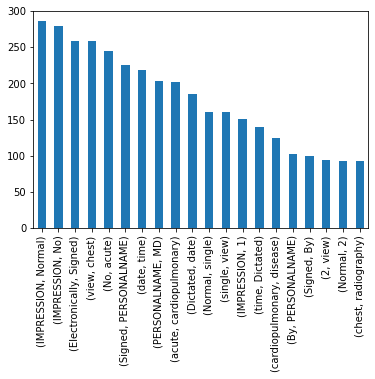

In [94]:
from nltk.util import ngrams
bigrams = words_df.apply(lambda x : list(ngrams(x,2))).values.tolist()
bigrams = [bi for lis in bigrams for bi in lis]
bi_freq = FreqDist(bigrams)

# plotting the bigrams
bi_fdist = pd.Series(dict(bi_freq.most_common(20)))
bi_fdist.plot.bar()

As from my previous assumption, it seems like most of the impressions involve the keywords "impression normal", which definitely seems to be a good thing for the patients recieving the exam. 

# Word Clouds

Now, we'll do a simple wordcloud diagram to visualize the data. Words that appear more frequently will be larger.

In [50]:
import wordcloud
from wordcloud import WordCloud

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words)

ModuleNotFoundError: No module named 'wordcloud'